# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : IF8 - Numpy
- Anggota : </br>
**10122277 - Sheli Maulida Salsiah</br>
10122287 - Naufal Fahrezi Maulana </br>
10122295 - Dimas Adhi Negoro </br>
10122297 - Dewa Ayu Sekar Purnama Devi </br>
10122306 - Natasya Farahdiva </br>
10122310 - Muhammad Fajar Satria Pamungkas**

## Menentukan Pertanyaan Bisnis

1. Kota apa saja yang menjadi top 5 dengan seller terbanyak
2. Berapa rata2 freight value untuk produk parfum
3. Mencari rata rata score reviews untuk product parfum
4. Berapa perbandigan payment_type yang digunakan untuk membeli barang dari kategori produk aksesoris
5. Berapa perbandingan setiap produk yang dibeli oleh customer yang berasal dari sao paulo dan dijual oleh seller yang berasal dari franca
6. Berapa perbandingan produk yang dibeli menggunakan credit card

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
seller_df = pd.read_csv('dataset/sellers_dataset.csv') #seller dataset
items_df = pd.read_csv('dataset/order_items_dataset.csv') #items dataset
produk_df = pd.read_csv('dataset/products_dataset.csv') #produk dataset
review_df = pd.read_csv('dataset/order_reviews_dataset.csv') #reviews dataset
payment_df = pd.read_csv('dataset/order_payments_dataset.csv') #payment dataset
customer_df = pd.read_csv('dataset/customers_dataset.csv') #customer dataset
order_df = pd.read_csv('dataset/orders_dataset.csv') #order dataset

### Assessing Data

In [3]:
seller_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3090    False
3091    False
3092    False
3093    False
3094    False
Length: 3095, dtype: bool

In [4]:
items_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
112645    False
112646    False
112647    False
112648    False
112649    False
Length: 112650, dtype: bool

In [5]:
produk_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32946    False
32947    False
32948    False
32949    False
32950    False
Length: 32951, dtype: bool

In [6]:
review_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99219    False
99220    False
99221    False
99222    False
99223    False
Length: 99224, dtype: bool

In [7]:
payment_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
103881    False
103882    False
103883    False
103884    False
103885    False
Length: 103886, dtype: bool

In [8]:
customer_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool

In [9]:
order_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

## Pertanyaan 1

In [10]:
#file csv yang akan digunakan
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [11]:
#menghitung jumlah seller dari setiap kota
jumlah_seller = seller_df['seller_city'].value_counts()
jumlah_seller

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

In [12]:
#filter menjadi top 5 kota dengan seller terbanyak
top5 = jumlah_seller.head(5)
top5

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: count, dtype: int64

## Pertanyaan 2:

In [13]:
#file csv yang akan digunakan
items_df
produk_df

#merge file item dataset dengan produk dataset untuk menemukan jumlah freight value serta produk yang diinginkan
merge1 = pd.merge(items_df, produk_df,
                  on = 'product_id',
                  how = 'inner')
#filter untuk kategori produk perfumaria
hasil1 = merge1[merge1["product_category_name"] == 'perfumaria']

display(hasil1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0
69,002955b0acc63d04f6724a31967e82bd,1,d9bdf643d95cb89844c0da1a0df1d16e,058fd0aa2bfdb2274e05e1ae971dabb6,2017-12-22 15:51:31,120.00,15.59,perfumaria,39.0,572.0,1.0,475.0,20.0,9.0,14.0
77,002d040018d12a3853c059f7f23ab5b1,1,97c58626cc3e15d514d2095f69650220,fe2032dab1a61af8794248c8196565c9,2017-11-27 03:47:23,155.00,14.84,perfumaria,38.0,242.0,1.0,429.0,20.0,12.0,14.0
101,003822434f91204da0a51fe4cf2aba18,1,99e71b776debf2f01a69dce207e3e4f8,c54679b132454625907c773d273d4126,2018-06-21 02:30:28,69.00,18.58,perfumaria,52.0,1891.0,1.0,250.0,16.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112473,ff96ea4ad10c612930198ecb923eb7a9,1,d5d7ab11292e030edb97398b69235779,0c7533c71df861ec58ad7ff999ed0e8d,2017-10-01 21:49:53,6.30,7.78,perfumaria,48.0,208.0,1.0,150.0,30.0,10.0,30.0
112493,ffa39020fe7c8a3e907320e1bec4b985,1,9e0e152552a1323f7e5dcf63d50cdae3,cc419e0650a3c5ba77189a1882b7556a,2017-11-10 18:55:13,56.99,14.15,perfumaria,48.0,969.0,3.0,400.0,20.0,11.0,11.0
112504,ffa9f4ba8992cf704640411b3cc3fb90,1,500622d5e5b51dc502c73dc7b3449202,2eeb6531ee027a48d401e72bebdd87d3,2017-02-26 18:12:38,9.90,10.96,perfumaria,36.0,272.0,1.0,200.0,16.0,4.0,11.0
112597,ffe2b9e50ccbd9695f42c906f6d9010c,1,3488d2ce36e718097c1509444289ef7f,26d8a1c7c75d513045798992ead43aa2,2018-03-22 12:15:33,185.99,15.38,perfumaria,40.0,1176.0,1.0,514.0,18.0,12.0,15.0


In [14]:
#lakukan mean untuk mencari rata-rata freight value
result1 = hasil1["freight_value"].mean()
data = [[result1]]
df1 = pd.DataFrame(data, columns=["hasil rata-rata freight value untuk produk parfum"], index=[""])
#show
df1

,hasil rata-rata freight value untuk produk parfum
,15.856636


## Pertanyaan 3:

In [15]:
#file csv yang akan digunakan
items_df
produk_df
review_df

#merge file item dataset dengan produk dataset untuk mengetahui kategori produk yang diingikan
merge1 = pd.merge(items_df, produk_df,
                   on='product_id',
                   how='inner')

#filter untuk kategori produk parfumaria
hasil1 = merge1[merge1["product_category_name"]=="perfumaria"]

display(hasil1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,perfumaria,43.0,116.0,1.0,468.0,23.0,18.0,19.0
69,002955b0acc63d04f6724a31967e82bd,1,d9bdf643d95cb89844c0da1a0df1d16e,058fd0aa2bfdb2274e05e1ae971dabb6,2017-12-22 15:51:31,120.00,15.59,perfumaria,39.0,572.0,1.0,475.0,20.0,9.0,14.0
77,002d040018d12a3853c059f7f23ab5b1,1,97c58626cc3e15d514d2095f69650220,fe2032dab1a61af8794248c8196565c9,2017-11-27 03:47:23,155.00,14.84,perfumaria,38.0,242.0,1.0,429.0,20.0,12.0,14.0
101,003822434f91204da0a51fe4cf2aba18,1,99e71b776debf2f01a69dce207e3e4f8,c54679b132454625907c773d273d4126,2018-06-21 02:30:28,69.00,18.58,perfumaria,52.0,1891.0,1.0,250.0,16.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112473,ff96ea4ad10c612930198ecb923eb7a9,1,d5d7ab11292e030edb97398b69235779,0c7533c71df861ec58ad7ff999ed0e8d,2017-10-01 21:49:53,6.30,7.78,perfumaria,48.0,208.0,1.0,150.0,30.0,10.0,30.0
112493,ffa39020fe7c8a3e907320e1bec4b985,1,9e0e152552a1323f7e5dcf63d50cdae3,cc419e0650a3c5ba77189a1882b7556a,2017-11-10 18:55:13,56.99,14.15,perfumaria,48.0,969.0,3.0,400.0,20.0,11.0,11.0
112504,ffa9f4ba8992cf704640411b3cc3fb90,1,500622d5e5b51dc502c73dc7b3449202,2eeb6531ee027a48d401e72bebdd87d3,2017-02-26 18:12:38,9.90,10.96,perfumaria,36.0,272.0,1.0,200.0,16.0,4.0,11.0
112597,ffe2b9e50ccbd9695f42c906f6d9010c,1,3488d2ce36e718097c1509444289ef7f,26d8a1c7c75d513045798992ead43aa2,2018-03-22 12:15:33,185.99,15.38,perfumaria,40.0,1176.0,1.0,514.0,18.0,12.0,15.0


In [31]:
#setelah itu merge hasil1 dengan review dataset
merge20 = pd.merge(hasil1, review_df,
                   on='order_id',
                   how='inner')

#setelah merge2 dilakukan, kita mencari rata-rata atau mean untuk produk parfum
result2 = merge20["review_score"].mean(numeric_only=True)
data = [[result2]]
df2 = pd.DataFrame(data, columns=["Rata-rata score yang diberikan untuk product parfum"], index=[""])
df2

,Rata-rata score yang diberikan untuk product parfum
,4.032871


## Pertanyaan 4:

In [17]:
#file csv yang digunakan
produk_df
items_df
payment_df
#merge produk dataset dengan items dataset untuk mengetahui kategori produk yang diingikan
merge1 = pd.merge(produk_df, items_df,
                  on = 'product_id',
                  how = 'inner')

#filter untuk kategori produk informatica_acessorios
hasil1 = merge1[merge1["product_category_name"]=='informatica_acessorios']

#show
display(hasil1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
31,a1b71017a84f92fd8da4aeefba108a24,informatica_acessorios,59.0,636.0,1.0,900.0,40.0,15.0,20.0,bee9e2345c4d8f186d2aa7d57e1589f3,1,87142160b41353c4e5fca2360caf6f92,2017-05-31 18:35:17,69.9,19.73
53,c78b767da00efb70c1bcccab87c28cd5,informatica_acessorios,35.0,1101.0,2.0,300.0,42.0,2.0,30.0,44e9b033432b09e965d73f10f3a6d179,1,85d9eb9ddc5d00ca9336a2219c97bb13,2018-03-06 07:27:08,38.9,14.10
54,c78b767da00efb70c1bcccab87c28cd5,informatica_acessorios,35.0,1101.0,2.0,300.0,42.0,2.0,30.0,5d8d5f0c825880c16968246b192e6899,1,85d9eb9ddc5d00ca9336a2219c97bb13,2018-01-24 03:36:57,38.9,12.48
55,c78b767da00efb70c1bcccab87c28cd5,informatica_acessorios,35.0,1101.0,2.0,300.0,42.0,2.0,30.0,709b96657091eec897b90173afb0b84d,1,85d9eb9ddc5d00ca9336a2219c97bb13,2018-07-02 22:20:30,38.9,50.99
56,c78b767da00efb70c1bcccab87c28cd5,informatica_acessorios,35.0,1101.0,2.0,300.0,42.0,2.0,30.0,9b070beae484bb1c36b85f9e8398c067,1,85d9eb9ddc5d00ca9336a2219c97bb13,2018-05-07 13:31:18,38.9,15.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112644,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,1,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.9,16.11
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,2018-01-10 03:32:09,29.9,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.9,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,2018-03-14 02:30:48,29.9,23.28


In [18]:
#merge hasil1 dengan payment dataset 
merge2 = pd.merge(hasil1, payment_df,
                  on = 'order_id',
                  how = 'inner')
#bautkan group untuk kolom payment_type
group_make = merge2.groupby('payment_type').size()

#buatkan dataframe baru
df_tot = pd.DataFrame(group_make).reset_index()
df_tot = df_tot.rename(columns={0: 'total'})

#show
display(df_tot)

,payment_type,total
0,boleto,2158
1,credit_card,5436
2,debit_card,148
3,voucher,340


## Pertanyaan 5:

In [19]:
#file csv yang digunakan
seller_df
items_df
order_df
customer_df
produk_df

#Pastikan 'seller_id' ada di seller dataset dan items dataset
if 'seller_id' in seller_df.columns and 'seller_id' in items_df.columns:
    #Proses merge
    merge1 = pd.merge(seller_df, items_df, on='seller_id', how='inner')
else:
    print("Kolom 'seller_id' tidak ditemukan di salah satu DataFrame.")
    
#filter untuk seller city berasal dari franca
hasil1 = merge1[merge1["seller_city"] == 'franca']

#Tampilkan hasil
display(hasil1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
5049,26e13b6ff5b641b329e5524241ee2c93,14401,franca,SP,1577a74e526c643276397c8e3069b37a,1,2202fbe16d5626431835d6000350cea3,2018-08-22 22:30:13,30.00,18.31
5050,26e13b6ff5b641b329e5524241ee2c93,14401,franca,SP,3058f418c175f89b5dc680bcb5634ab1,2,a641c89dc8c19516ec7706a3c09c9424,2018-08-24 18:15:09,29.90,25.93
5051,26e13b6ff5b641b329e5524241ee2c93,14401,franca,SP,5b72a0a59eaf0de6502b2959810e3dd5,1,f6c3624f0bad00eefa032e306776a77b,2018-08-17 18:24:15,29.90,12.87
5052,26e13b6ff5b641b329e5524241ee2c93,14401,franca,SP,9d490e0cc1734e6efc3c66e08acc7d3b,1,985917955434700f83de118d8978d560,2018-08-07 05:04:02,29.90,12.87
7085,ececbfcff9804a2d6b40f589df8eef2b,14407,franca,SP,018cb6a10649393055c272ba2984e8bb,1,3c949f7dabf571691248f935a0063fbd,2018-04-09 18:49:48,56.80,18.28
...,...,...,...,...,...,...,...,...,...,...
103973,167fd940acebc789debd6eb418c46e38,14405,franca,SP,8711deabc099e5d2c3c89afd73e485a6,1,ae4361f806c49f85066cc8be1370c91e,2017-12-07 12:12:44,299.98,28.42
103974,167fd940acebc789debd6eb418c46e38,14405,franca,SP,a3881d763588c17dc4e258628e6951fb,1,ae4361f806c49f85066cc8be1370c91e,2018-03-29 13:50:33,299.90,21.44
103975,167fd940acebc789debd6eb418c46e38,14405,franca,SP,e0e83bdc2be394626d0f9177dcde0889,1,38fbdbd0a9be4733e29cd1afe360e23b,2018-04-06 15:31:04,149.90,13.49
103976,167fd940acebc789debd6eb418c46e38,14405,franca,SP,e6547213be0aa7f2ebefd6ca62b1484c,1,fb081b5a825e6503771ad43cf0e59dfc,2017-12-28 02:10:55,27.90,16.11


In [20]:
#merge customer dataset dengan order dataset untuk mengetahui customer city dari sao paulo
#proses merge
merge2 = pd.merge(order_df, customer_df,
                  on = 'customer_id',
                  how = 'inner')

#filtering data by value
hasil2 = merge2[merge2["customer_city"]=='sao paulo']

#show
display(hasil2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
11,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,delivered,2017-07-13 19:58:11,2017-07-13 20:10:08,2017-07-14 18:43:29,2017-07-19 14:04:48,2017-08-08 00:00:00,782987b81c92239d922aa49d6bd4200b,4278,sao paulo,SP
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP
14,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99407,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28 00:00:00,a3adfb1ef257529c6abe81be7726a63f,1454,sao paulo,SP
99409,87b4c933f31145a28413b39d880ad6c3,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,2018-03-02 17:12:05,2018-03-02 17:49:24,2018-03-06 21:23:32,2018-03-16 17:21:55,2018-03-21 00:00:00,490c3c53ca927221bccbb00706afbcf9,2042,sao paulo,SP
99414,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,fb9310710003399b031add3e55f34719,3318,sao paulo,SP
99429,0e4b26f1fb99fc0f0472dd5f403d36d4,2e96fa6d55b9732013caed9866e2552d,delivered,2017-11-05 16:17:53,2017-11-05 16:30:29,2017-11-07 18:35:08,2017-11-08 16:08:56,2017-11-17 00:00:00,22757c044f096bef19c36c5d6ffc51d5,1308,sao paulo,SP


In [21]:
#merge hasil1 dan hasil2 untuk menemukan transaksi yang terjadi dari seller city franca dengan customer city sao paulo
#proses merge
merge3 = pd.merge(hasil1, hasil2,
                  on = 'order_id',
                  how = 'inner')

#merge merge3 dengan product dataset untuk mencari tahu perbandingan barang yg dibeli
#proses merge
merge4 = pd.merge(merge3, produk_df,
                  on ='product_id',
                  how = 'inner')
#show
display(merge4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,26e13b6ff5b641b329e5524241ee2c93,14401,franca,SP,5b72a0a59eaf0de6502b2959810e3dd5,1,f6c3624f0bad00eefa032e306776a77b,2018-08-17 18:24:15,29.90,12.87,...,sao paulo,SP,fashion_calcados,51.0,1436.0,1.0,300.0,16.0,16.0,16.0
1,ececbfcff9804a2d6b40f589df8eef2b,14407,franca,SP,021d35119e0e191a4fa47715d479b6f8,1,bdf752aa5ccd0dfb9e9ed401b672f133,2018-03-08 13:30:33,84.99,12.09,...,sao paulo,SP,relogios_presentes,58.0,558.0,1.0,150.0,20.0,5.0,15.0
2,ececbfcff9804a2d6b40f589df8eef2b,14407,franca,SP,032b42b17fe9daa676ba9447f3dbbd0a,1,0127db1f4effcf8f5b88d80588bc5624,2018-08-08 22:44:39,49.00,13.00,...,sao paulo,SP,relogios_presentes,53.0,555.0,1.0,200.0,20.0,7.0,15.0
3,ececbfcff9804a2d6b40f589df8eef2b,14407,franca,SP,04f9ef79f6d6439da363d065445c2325,1,ad21c6ffe97ed6db7a3d73b51bca2ee0,2018-05-18 17:21:28,47.60,12.79,...,sao paulo,SP,beleza_saude,43.0,581.0,1.0,150.0,16.0,7.0,15.0
4,ececbfcff9804a2d6b40f589df8eef2b,14407,franca,SP,077a77e315e3b317121a0af9962e122b,1,5a3564d805d5fb2e52e88bb740d9b4ea,2018-05-15 10:58:06,56.80,12.84,...,sao paulo,SP,beleza_saude,57.0,828.0,1.0,200.0,20.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,7202e2ba20579a9bd1acb29e61fe71f6,14401,franca,SP,2dce16f88737c679c4fddab2b2cf88da,1,3c1907ae45ee32709a71b67f20f65814,2017-08-16 14:45:11,109.90,12.27,...,sao paulo,SP,telefonia,40.0,988.0,3.0,250.0,21.0,11.0,14.0
78,7202e2ba20579a9bd1acb29e61fe71f6,14401,franca,SP,744bade1fcf9ff3f31d860ace076d422,1,0cf573090c66bb30ac5e53c82bdb0403,2018-04-26 12:31:06,45.90,12.79,...,sao paulo,SP,telefonia,26.0,108.0,1.0,128.0,15.0,8.0,13.0
79,7202e2ba20579a9bd1acb29e61fe71f6,14401,franca,SP,b0ef007a9f33ffd24dcfba02178afed5,1,12f3396e4e36112d4155e0c51ee35ed9,2018-04-16 10:55:25,199.90,13.84,...,sao paulo,SP,telefonia,52.0,616.0,1.0,200.0,21.0,11.0,13.0
80,7202e2ba20579a9bd1acb29e61fe71f6,14401,franca,SP,ce4c70f737d1a9edba23290f6031d076,1,0cf573090c66bb30ac5e53c82bdb0403,2018-04-11 02:28:06,45.90,12.79,...,sao paulo,SP,telefonia,26.0,108.0,1.0,128.0,15.0,8.0,13.0


In [22]:
#hitung jumlah untuk setiap kategori produk
hasil = merge4['product_category_name'].value_counts()
nama = merge4['product_category_name']
data = [[nama, hasil]]
df3 = pd.DataFrame(data, columns=['product_category_name', "count"])
display(df3)

,product_category_name,count
0,0 fashion_calcados 1 relogios_presen...,product_category_name beleza_saude ...


## Pertanyaan 6:

In [23]:
#file csv yang digunakan
payment_df
items_df
produk_df
#merge payment dataset dengan items dataset untuk mengetahui produk id yang menggunakan payment_type tertentu
merge1 = pd.merge(payment_df, items_df,
                  on = 'order_id',
                  how = 'inner')
#filter kolom payment_type dengan hasil credit card
hasil1 = merge1[merge1["payment_type"]=='credit_card']

#show
display(hasil1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...,...
117594,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62,1,036734b5a58d5d4f46b0616ddc047ced,ea8482cd71df3c1969d7b9473ff13abc,2017-11-30 10:11:16,29.99,17.63
117595,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,1,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78


In [24]:
#merge hasil1 dan produk dataset untuk mengetahui kategori produk apa saja yang melakukan transaksi menggunakan credit card
#proses merge
merge2 = pd.merge(hasil1, produk_df,
                  on = 'product_id',
                  how = 'inner')
#menghitung jumlah setiap kategori produk yang melakukan pembayaran menggunakan credit card
df = merge2["product_category_name"].value_counts()
#tampilkan 5 teratas
top_5 = df.head(5)
top_5

product_category_name
cama_mesa_banho           8959
beleza_saude              7566
esporte_lazer             6635
moveis_decoracao          6379
informatica_acessorios    5436
Name: count, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

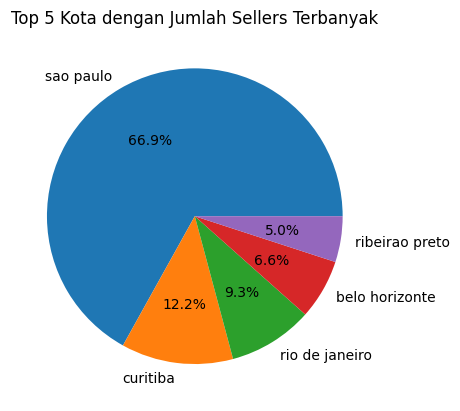

In [25]:
plt.pie(x = top5.values, labels = top5.index, autopct= '%1.1f%%')
plt.title('Top 5 Kota dengan Jumlah Sellers Terbanyak')
plt.show()

### Pertanyaan 2: 

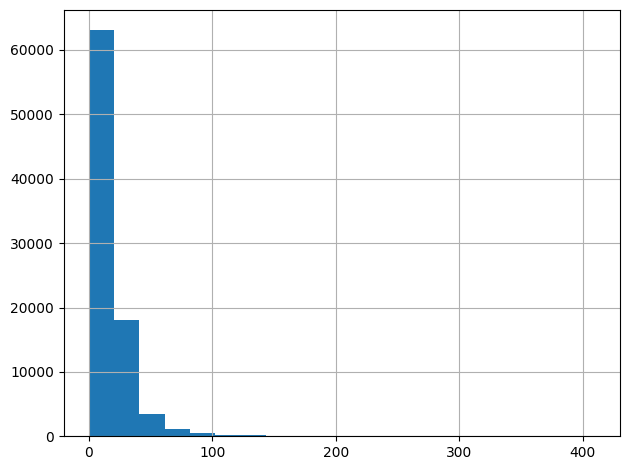

In [29]:
df = hasil1["freight_value"]
df.hist(bins=20);

# agar tidak overlapping
plt.tight_layout()
plt.show()

## Pertanyaan 3:

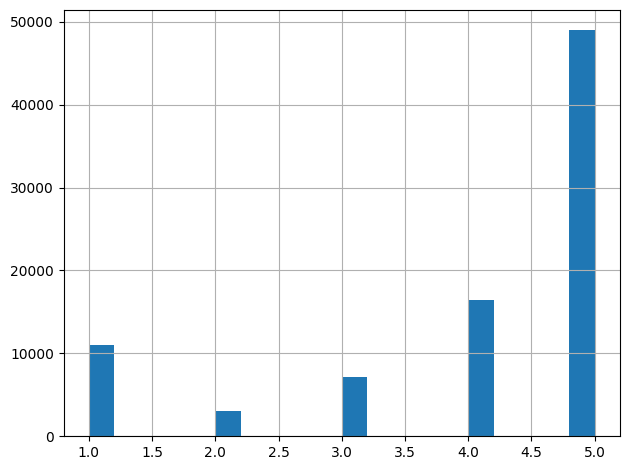

In [32]:
df = merge20["review_score"]
df.hist(bins=20);

# agar tidak overlapping
plt.tight_layout()
plt.show()

## Pertanyaan 4:

In [ ]:
total = df_tot["total"]
payment_type = df_tot["payment_type"]

plt.pie(total, labels=payment_type, autopct='%1.1f%%')
 
# show plot
plt.show()

## Pertanyaan 5

In [ ]:
hasil.plot(kind='bar', color='skyblue')
plt.pie(x = hasil.values, labels= hasil.index, autopct= '%1.1f%%')
plt.title('Perbandingan Produk per Kategori')

plt.show()

## Pertanyaan 6

In [ ]:
plt.pie(x = top_5.values, labels= top_5.index, autopct= '%1.1f%%')
plt.title('5 Kategori Teratas Dengan Payments Credit Cards')

plt.show()

## Conclusion

- Conclution pertanyaan 1

  Jadi 5 Kota dengan jumlah seller terbanyak adalah: </br>
    **- Sao Paolo </br>
      - Curitiba </br>
      - Rio De Jeneiro </br>
      - Belo Horizonte </br>
      - Riberiao Preto**

- Conclution pertanyaan 2 </br>
  hasil rata-rata freight value untuk produk parfum adalah  **15.856636443404502**

- Conclution Pertanyaan 3 </br>
    Rata-rata score yang diberikan untuk product parfum adalah  **4.161940952937737** dan jumlah review terbanyak adalah **5**

- Conclution Pertanyaan 4 </br>

    jadi penjualan produk pada kategori aksesoris barang paling banyak dilakukan menggunakan **credit card** dengan total customer mencapai **5.436**</br>
    atau sebesar **67,3%**

- Conclution Pertanyaan 5 </br>
    jadi, barang yang dibeli oleh customer dari sao paulo dan seller yang menjualnya berasal dari franca adalah **beleza saude**
  

- Conclution Pertanyaan 6 </br>
    Jadi produk yang paling banyak dibeli menggunakan Credit Cards adalah adalah **Cama Mesa Baho**